<a href="https://colab.research.google.com/github/reddybommu/bommutest/blob/main/Pred_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

Here in this data set my Independent variable(x) is Sorting Time and my dependent or target variable(y) is Delivery Time


In [1]:
import pandas as pd
data = pd.read_csv("/content/delivery_time.csv")
data.tail()

FileNotFoundError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data = data.rename(columns= {"Delivery Time": "DT" })
data = data.rename(columns= {"Sorting Time": "ST" })
data


,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [ ]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


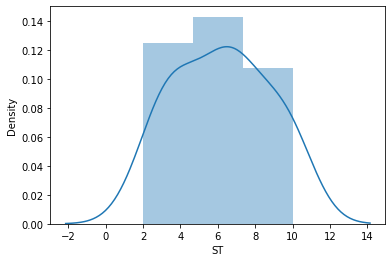

In [ ]:
import seaborn as sns
sns.distplot(data['ST'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


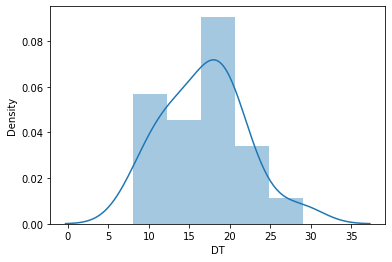

In [ ]:
import seaborn as sns
sns.distplot(data['DT'])

Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data).fit()

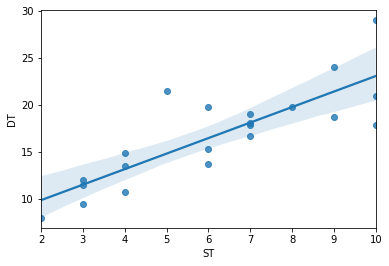

In [ ]:
sns.regplot(x="ST", y="DT", data=data);

In [ ]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


#R squared values
(model.rsquared,model.rsquared_adj)

# Predict for new data point

In [ ]:
x = data.iloc[:,1] ## Here 'x' is my Sorting Time
x

y_pred = model.predict(x)
y_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
y =data.iloc[:,0]-y_pred ## Here 'y' is my Actual value and 'y_pred' is my Prediction value
y

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(data.DT,y_pred))
rmse

2.7916503270617654